In [123]:
import pandas as pd

# Load the dataset
df = pd.read_csv('suicide_data.csv')
# Display the first 5 rows
df.head(5)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [125]:
df.shape

(31756, 12)

In [127]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [131]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [129]:
df.info

<bound method DataFrame.info of                         country  year     sex          age  suicides_no  \
0                       Albania  1987    male  15-24 years         21.0   
1                       Albania  1987    male  35-54 years         16.0   
2                       Albania  1987  female  15-24 years         14.0   
3                       Albania  1987    male    75+ years          1.0   
4                       Albania  1987    male  25-34 years          9.0   
...                         ...   ...     ...          ...          ...   
31751                   Ukraine  2017  female    75+ years        256.0   
31752            United Kingdom  2017  female    75+ years        104.0   
31753  United States of America  2017  female    75+ years        501.0   
31754                   Uruguay  2017  female    75+ years         14.0   
31755                Uzbekistan  2017  female    75+ years          3.0   

       population  suicides/100k pop                  country-year 

In [64]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,31756.000000,30556.000000,3.175600e+04,31756.000000,12300.000000,31756.000000
mean,2003.395390,237.136242,7.217454e+06,11.716668,0.793666,17588.954606
std,9.760604,867.956107,5.799323e+07,21.590926,0.097480,19464.861140
min,1985.000000,0.000000,2.780000e+02,0.000000,0.377790,251.000000
25%,1996.000000,3.000000,1.288210e+05,0.370000,0.727000,3765.000000
50%,2004.000000,25.000000,5.468325e+05,4.285000,0.800457,10062.000000
75%,2011.000000,132.000000,2.908763e+06,14.560000,0.874000,25622.000000
max,2020.000000,22338.000000,1.411100e+09,515.092734,0.975114,126352.000000


In [66]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())

# Handle HDI (likely missing in most rows)
if df['HDI for year'].isnull().mean() > 0.5:
    df.drop(columns=['HDI for year'], inplace=True)  # Drop if >50% missing
else:
    df['HDI for year'].fillna(df.groupby('country')['HDI for year'].transform('median'), inplace=True)  # Impute with country median

# Drop rows with missing critical data (e.g., suicides_no, population)
df.dropna(subset=['suicides_no', 'population'], inplace=True)

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year              0
gdp_per_capita ($)        0
generation                0
dtype: int64

KeyError: "['HDI for year'] not found in axis"

In [74]:
df.isnull().sum()


country                  0
year                     0
sex                      0
age                      0
suicides_no           1200
population               0
suicides/100k pop        0
country-year             0
gdp_for_year             0
gdp_per_capita ($)       0
generation               0
dtype: int64

In [76]:
# Convert "2,15,66,24,900" to 2156624900
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',', '').astype(float)

# Verify conversion
print("\nGDP Column Cleaned:")
print(df[['gdp_for_year', 'gdp_per_capita ($)']].head())


GDP Column Cleaned:
   gdp_for_year  gdp_per_capita ($)
0  2.156625e+09               796.0
1  2.156625e+09               796.0
2  2.156625e+09               796.0
3  2.156625e+09               796.0
4  2.156625e+09               796.0


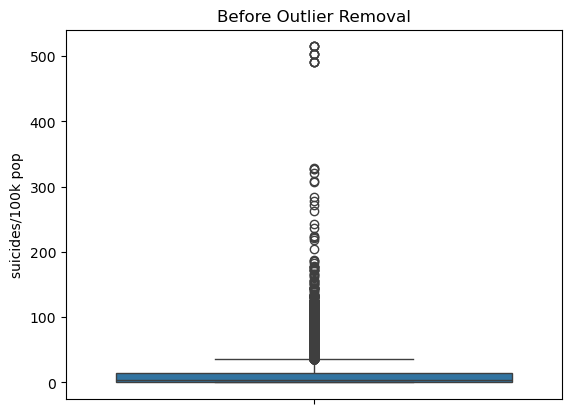

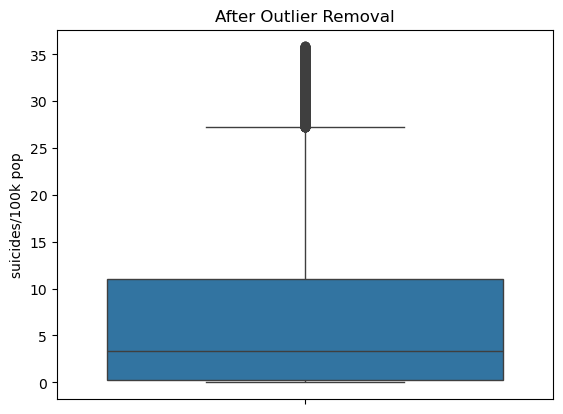

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Detect outliers in suicides/100k pop using IQR
Q1 = df['suicides/100k pop'].quantile(0.25)
Q3 = df['suicides/100k pop'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
df_clean = df[(df['suicides/100k pop'] >= lower_bound) & (df['suicides/100k pop'] <= upper_bound)]

# Visualize before/after
sns.boxplot(df['suicides/100k pop'])
plt.title('Before Outlier Removal')
plt.show()

sns.boxplot(df_clean['suicides/100k pop'])
plt.title('After Outlier Removal')
plt.show()

In [79]:
# Simplify age groups (optional)
df['age'] = df['age'].str.replace(' years', '')

# Drop redundant columns
df_clean = df_clean.drop(columns=['country-year'])



In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_clean[['gdp_per_capita ($)', 'suicides/100k pop']] = scaler.fit_transform(df_clean[['gdp_per_capita ($)', 'suicides/100k pop']])

In [80]:
# # Group by sex and age
# summary = df_clean.groupby(['sex', 'age'])['suicides/100k pop'].agg(['mean', 'median', 'std'])
# print("Summary by Sex and Age:\n", summary)

Summary by Sex and Age:
                         mean    median       std
sex    age                                      
female 15-24 years  0.105313  0.077846  0.118249
       25-34 years  0.113208  0.089286  0.112095
       35-54 years  0.146905  0.110910  0.140457
       5-14 years   0.011733  0.004464  0.024237
       55-74 years  0.175479  0.120257  0.183635
       75+ years    0.201342  0.097935  0.249015
male   15-24 years  0.290704  0.257812  0.237780
       25-34 years  0.368665  0.352400  0.280513
       35-54 years  0.384774  0.355190  0.288824
       5-14 years   0.019484  0.009766  0.031025
       55-74 years  0.375373  0.344169  0.304723
       75+ years    0.307814  0.233119  0.318695


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'suicides_no'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'suicides/100k pop'}>],
       [<Axes: title={'center': 'gdp_for_year'}>,
        <Axes: title={'center': 'gdp_per_capita ($)'}>]], dtype=object)

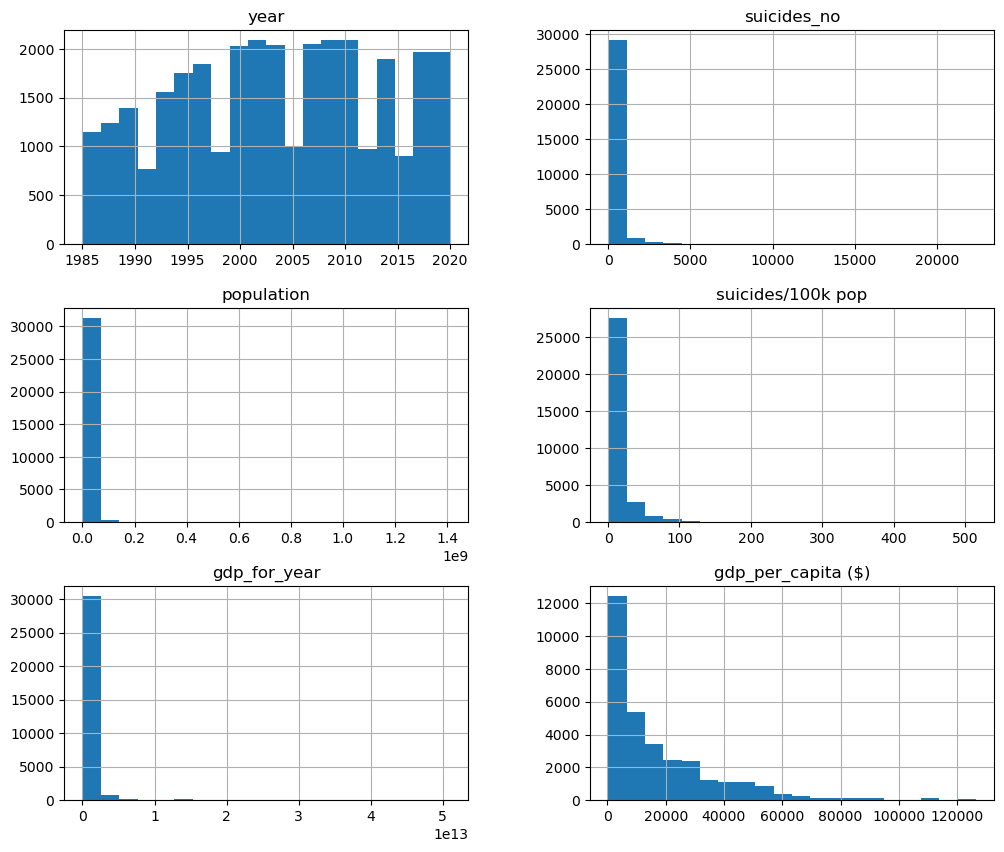

In [96]:
df.hist(figsize=(12,10),bins = 20)

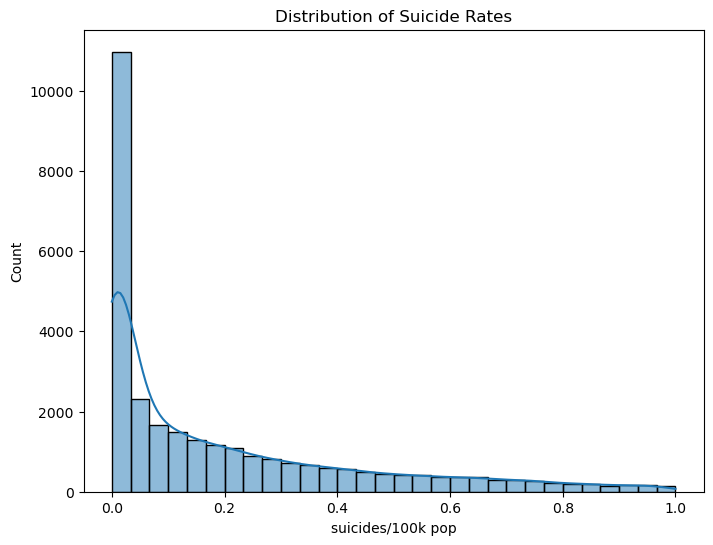

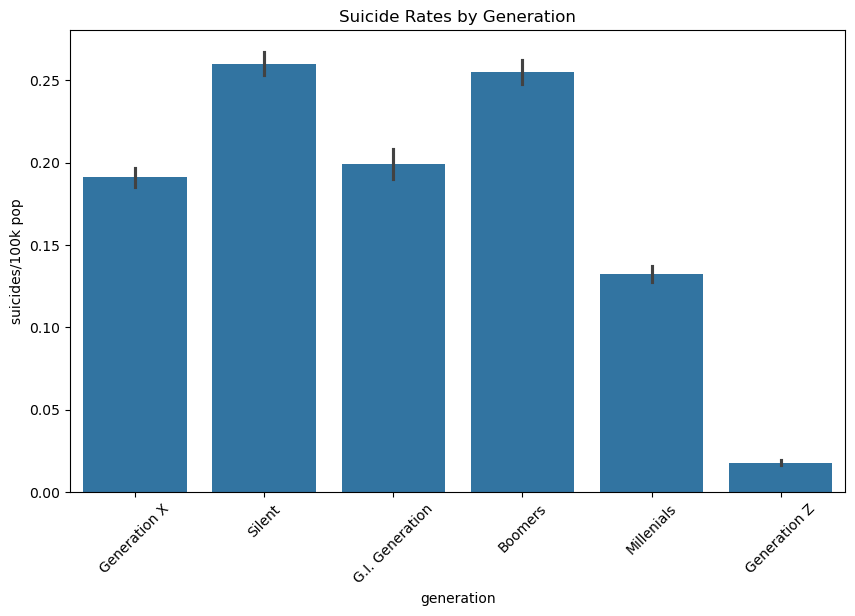

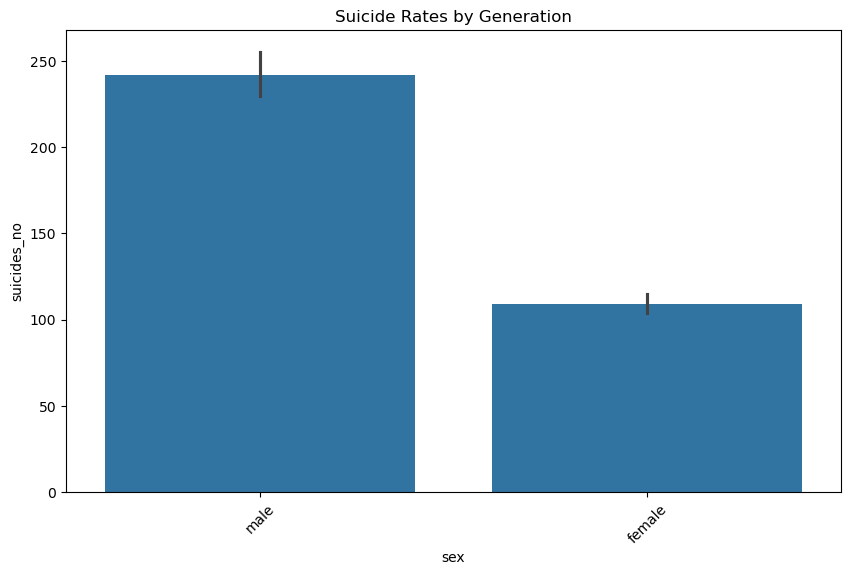

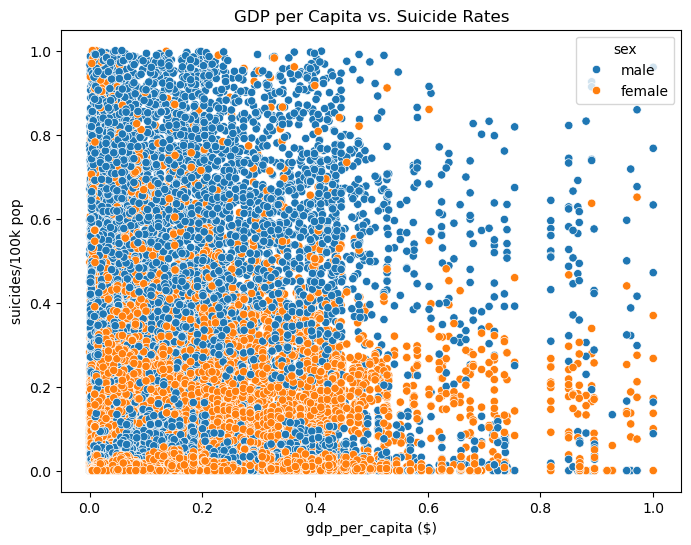

In [81]:
# Histogram of suicide rates
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['suicides/100k pop'], bins=30, kde=True)
plt.title('Distribution of Suicide Rates')
plt.show()

# Box plot by generation
plt.figure(figsize=(10, 6))
sns.barplot(x='generation', y='suicides/100k pop', data=df_clean)
plt.title('Suicide Rates by Generation')
plt.xticks(rotation=45)
plt.show()

# Box plot by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='suicides_no', data=df_clean)
plt.title('Suicide Rates by Generation')
plt.xticks(rotation=45)
plt.show()

# Scatter plot: GDP vs. Suicide Rates
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df_clean, hue='sex')
plt.title('GDP per Capita vs. Suicide Rates')
plt.show()

In [57]:
df_clean.head(2)
# df.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,0.181156,2.156625e+09,0.004322,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,0.140119,2.156625e+09,0.004322,Silent


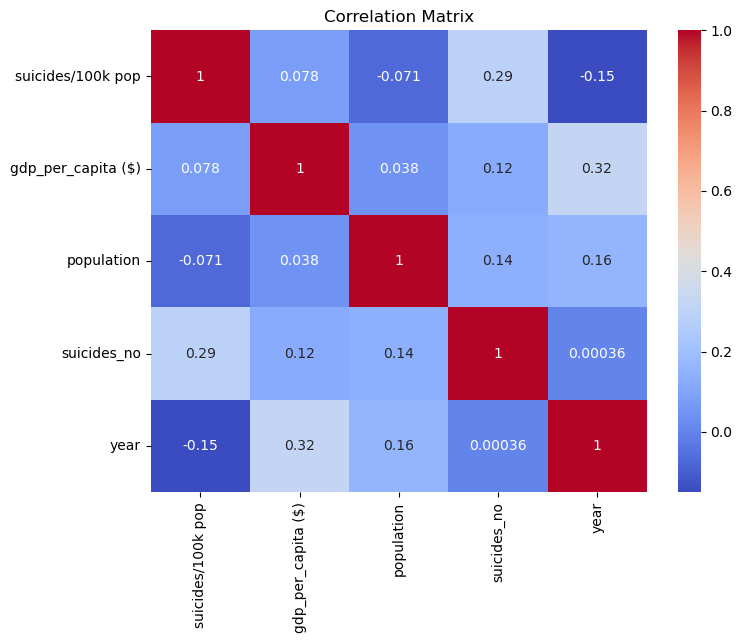

In [65]:
# Calculate correlations
corr_matrix = df_clean[['suicides/100k pop', 'gdp_per_capita ($)', 'population','suicides_no','year']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [59]:
from scipy.stats import ttest_ind

# Split data into male and female groups
male = df_clean[df_clean['sex'] == 'male']['suicides/100k pop']
female = df_clean[df_clean['sex'] == 'female']['suicides/100k pop']

# Perform t-test
t_stat, p_value = ttest_ind(male, female, nan_policy='omit')
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: Suicide rates differ significantly by gender.")
else:
    print("No significant difference in suicide rates by gender.")

T-statistic: 61.09, P-value: 0.0000
Reject null hypothesis: Suicide rates differ significantly by gender.


In [60]:
import statsmodels.api as sm

# Define predictors and target
X = df_clean['gdp_per_capita ($)']
y = df_clean['suicides/100k pop']
X = sm.add_constant(X)  # Add intercept

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

# Interpret coefficients
print(f"\nGDP Coefficient: {model.params['gdp_per_capita ($)']:.4f}")
print("A negative coefficient suggests higher GDP correlates with lower suicide rates.")

                            OLS Regression Results                            
Dep. Variable:      suicides/100k pop   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     172.9
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           2.23e-39
Time:                        18:37:10   Log-Likelihood:                 55.220
No. Observations:               28175   AIC:                            -106.4
Df Residuals:                   28173   BIC:                            -89.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1862      0

In [120]:
# h = df_clean[(df_clean.loc[:,'suicides/100k pop']>500)|(df_clean.loc[:,'suicides/100k pop']<100)]
# sns.barplot(x = 'suicides/100k pop', y= 'country',data = h, palette = 'coolwarm', hue='country')